# **Data Visualization with Python**

# Part 2_Area_Histogram_Bar


#### Author: Avery Jan

#### Date: 9-20-2022

***

# Overview

This part of the project uses the same Canada Immigration Dataset as in Part 1 to create Area Plots, Histograms, and Bar Charts. The dataset is downloaded and read into a pandas dataframe. Since the dataset does not contain missing values as concluded in the Preparing Data section of Part 1 and the statistical summary has already been viewed in Part 1, the tasks relevant to these tasks are eliminated from the data preparation. As a result, a six-step data preparation procedure is used to prepare the data for creating visualizations in this part as well as other parts of the project that use this dataset. In this part, the three types of visualizations generated are: 
1. Area Plots for the top five and the bottom five countries 
2. Histograms of all 195 countries and the three Scandinavian countries 
3. Vertical Bar Chart of a case study on Iceland and Horizontal Bar Chart for Top 15 countries

# The Dataset: Immigration to Canada from 1980 to 2013 <a id="2"></a>


Dataset Source: [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).

The dataset contains annual data on the flows of international immigrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous/next residence both for foreigners and nationals. This version of the dataset presents data pertaining to 45 countries of destination.

This part of the project uses the Canada subset that includes data on immigration to Canada from 1980 to 2013.
https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx


***

# Downloading Data <a id="2"></a>


In [1]:
# Install openpyxl (formerly xlrd), a module that pandas requires to read Excel files.
import piplite
await piplite.install(['openpyxl==3.0.9'])

In [2]:
# Import two key data analysis modules: pandas and numpy.
import numpy as np  
import pandas as pd 

In [3]:
# Download the Canadian Immigration Dataset and read it into a pandas dataframe.

from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())

df_can = pd.read_excel(
    text,
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [4]:
#  look at the first five rows in the dataset.
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
# Get the dimensions of the dataframe.
print(df_can.shape)

(195, 43)


***

# Preparing Data <a id="2"></a>



### 1. Clean up the dataset to remove columns that are not informative for visualization.


In [6]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# View the first five rows to see if these columns were removed.
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


#### Comment 
These five columns: Type, Coverage, AREA, REG, and DEV were removed from the dataframe.
The dataframe now has 38 columns down from 43 columns.

### 2. Rename some of the columns to meaningful names.


In [7]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# View the first five rows to see if these columns were renamed. 
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


#### Comment
The first three columns were renamed.


### 3. Convert column labels to 'string' to avoid confusion introduced by having an integer as the column name.


In [8]:
# Step 1: Check the initial types of the column labels to see if they are all of type 'string.'

all(isinstance(column, str) for column in df_can.columns)

False

#### Comment
Not all the column labels are of type **string**. So, next, change them all to **string** type.

In [9]:
# Step 2: Change all column labels to 'string' type. 
df_can.columns = list(map(str, df_can.columns))

# Step 3: Re-check the column labels to see if they are all 'string' type now. 
all(isinstance(column, str) for column in df_can.columns)

True

### 4. Set the country name as the index to facilitate the selection of data by country.


In [10]:
df_can.set_index('Country', inplace=True)

# View the first five rows to check if the dataframe has the Country names as indices. 
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


#### Comment
The country names now serve as indices.


### 5. Add a column called 'Total' to hold the total numbe of immigrants from each country. 


In [11]:
df_can['Total'] = df_can.sum(axis=1)

# View the first five rows to see how the dataframe has been changed so far.
df_can.head()

<ipython-input-11-1473015e5e4c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


#### Comment

The dataframe has an extra column 'Total' that presents the total number of immigrants from each country in the dataset from 1980 - 2013. 

In [12]:
# Get the dimension of the dataframe following the addition of the column 'Total.'

print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


#### Comment

The dataframe now has 38 columns instead of 37 columns that it had before.

### 6. Create a list of the names of year columns (1980-2013, in type 'string') to be used for creating visualizations

In [13]:
# Create a list of years from 1980 - 2013, with all years in 'string' type. 

years = list(map(str, range(1980, 2014)))

years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

***

# Visualizing Data using Matplotlib<a id="4"></a>


In [14]:
# Use the inline backend to generate the plots within the browser.
%matplotlib inline

# Import matplotlib and matplotlib.pyplot.
import matplotlib as mpl
import matplotlib.pyplot as plt

# Set the style of plots.
mpl.style.use('ggplot')  

# Check for latest version of Matplotlib.
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.5.1


# 1. Area Plots<a id="6"></a>


In [15]:
# Goal: Define a dataframe that contains the data of the top 5 countries that contribued the most immigrants to Canada from 1980 to 2013. 

# Step 1: Sorting the total number of immigrants by country in descending order. 
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# Step 2: Get the data of the top 5 entries, i.e., the top 5 countries that contributed the most immigrants to Canada from 1980 to 2013. 
df_top5 = df_can.head()

# Step 3: Transpose the dataframe.
df_top5 = df_top5[years].transpose()

# View the data of the top 5 countries.
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


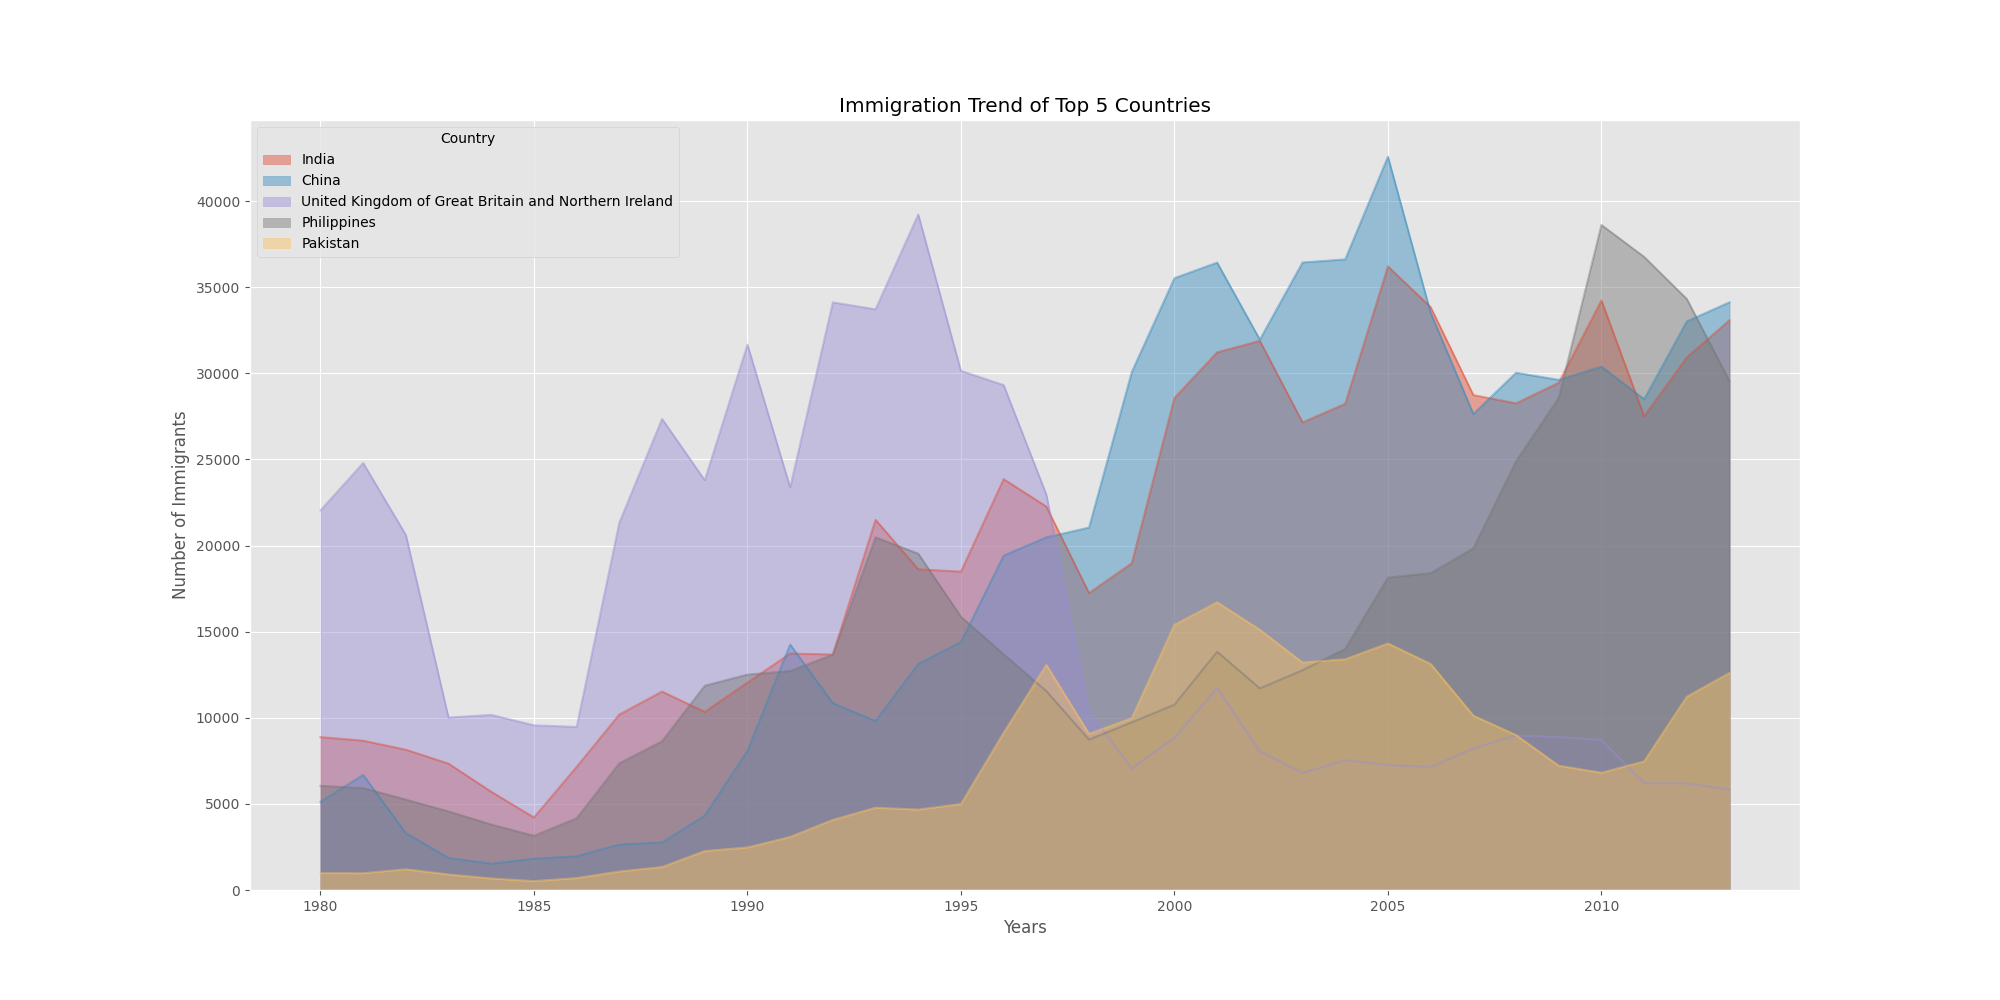

<Figure size 2000x1000 with 0 Axes>

In [16]:
# Goal: Create a unstacked area plot of the 5 countries contributing the most to immigration to Canada from 1980 to 2013. 
# Use procedural method - using matplotlib.pyplot as 'plt.' 

# Step 1: Change the index values of df_top5 to type 'integer' for plotting them on the horizontal axis of the area plot. 
df_top5.index = df_top5.index.map(int)

# Step 2: Create an unstacked area plot. 
df_top5.plot(kind='area', 
             alpha=0.45,  # 0 - 1, default value alpha = 0.45
             stacked=False,
             figsize=(20, 10))

# Step 3: Add a title and axes labels. 
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# Step 4: Display the plot. 
plt.show()

Text(0.5, 0, 'Years')

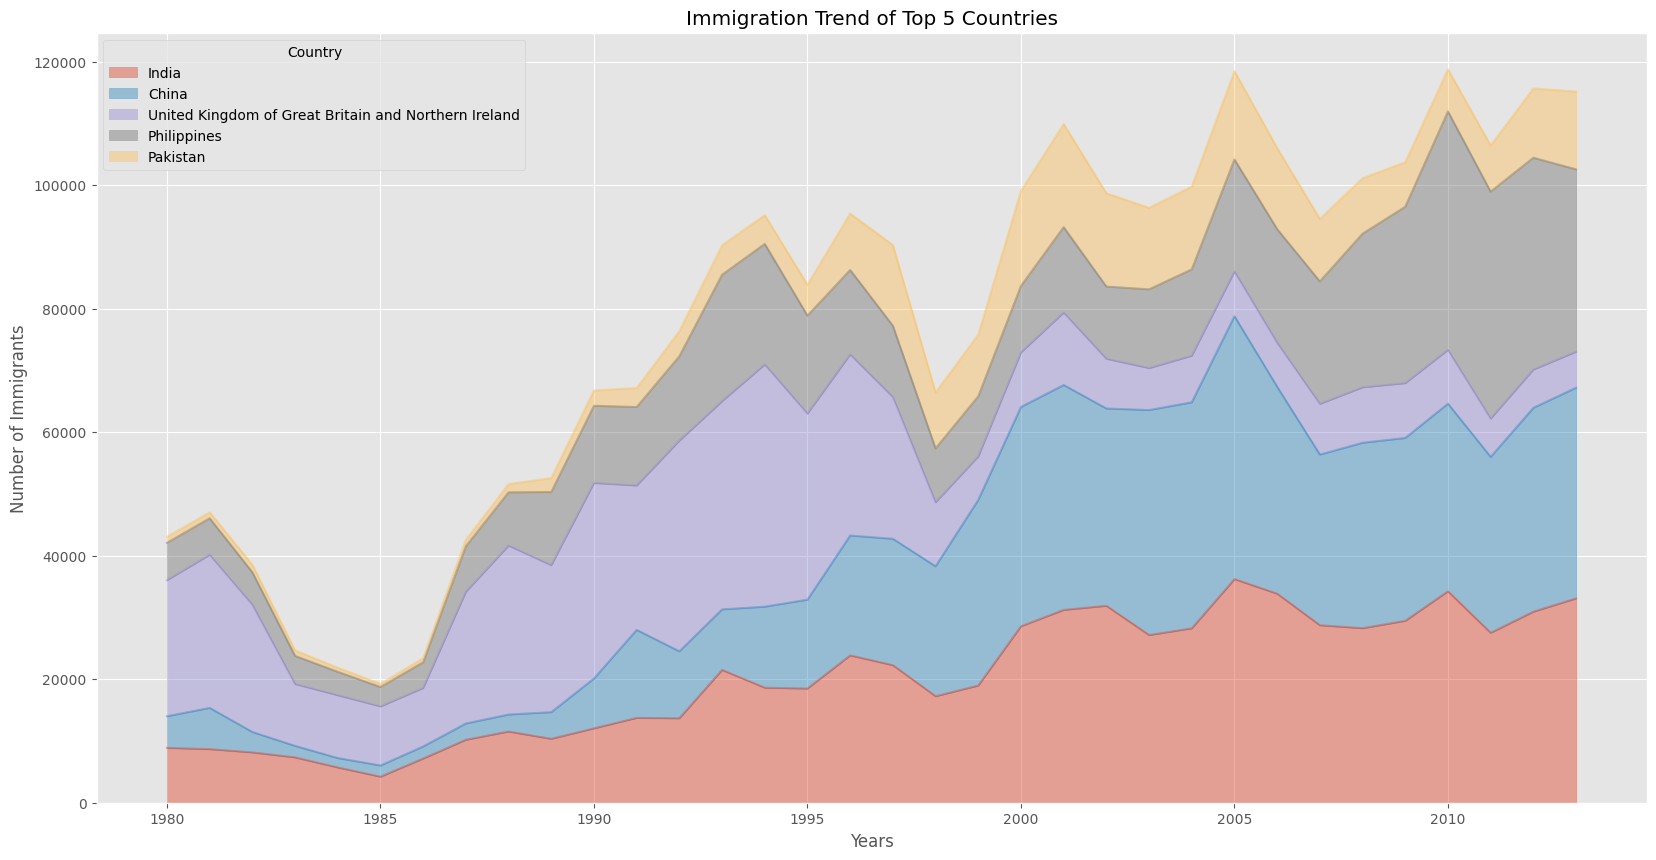

In [17]:
# Goal: Create a stacked area plot of the 5 countries contributing the most to immigration to Canada from 1980 to 2013. 
# Use object oriented method - using an Axes instance from Matplotlib.

# Step 1: Using an Axes instance from Matplotlib and store it in a variable 'ax' to create an area plot.
## This is an object oriented method, so it can call many other methods to add more elements to the plot. 
ax = df_top5.plot(kind='area', alpha=0.45, figsize=(20, 10))

# Step 2:Add a title and axes labels.
ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

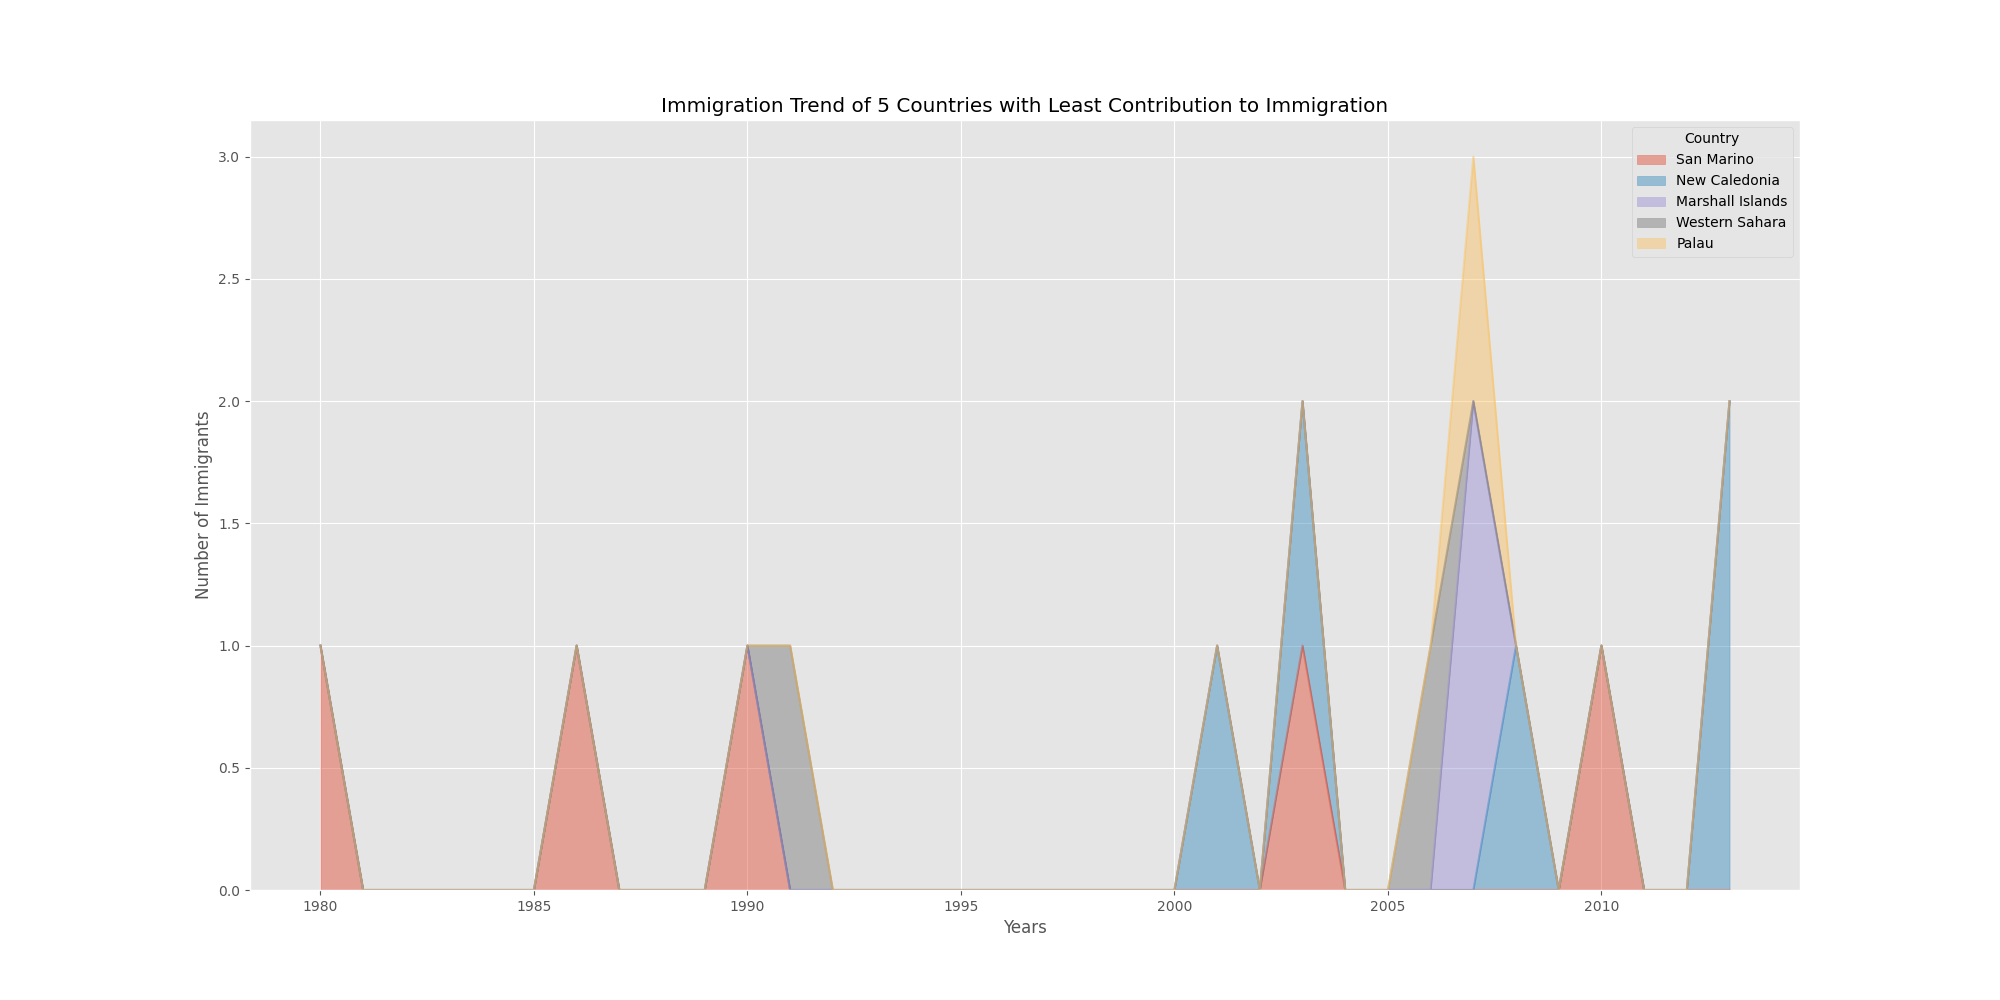

<Figure size 2000x1000 with 0 Axes>

In [18]:
# Goal: Create a stacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013.
# Use procedural method - using matplotlib.pyplot as 'plt.'

# Step 1: Get the 5 countries with the least contribution to immigration to Canada. 
df_least5 = df_can.tail(5)  # The data in 'Total' column have been sorted in descending order at this point. 
     
# Step 2: Transpose the dataframe df_least5.
df_least5 = df_least5[years].transpose() 
df_least5.head()

# Step 3: Change the index values of df_least5 to type 'integer' for plotting.
df_least5.index = df_least5.index.map(int) 
    
# Step 4: Create a stacked area plot. 
df_least5.plot(kind='area', alpha=0.45, figsize=(20, 10)) 

# Step 5: Add a title and axes labels. 
plt.title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# Step 6: Display the plot. 
plt.show()

Text(0.5, 0, 'Years')

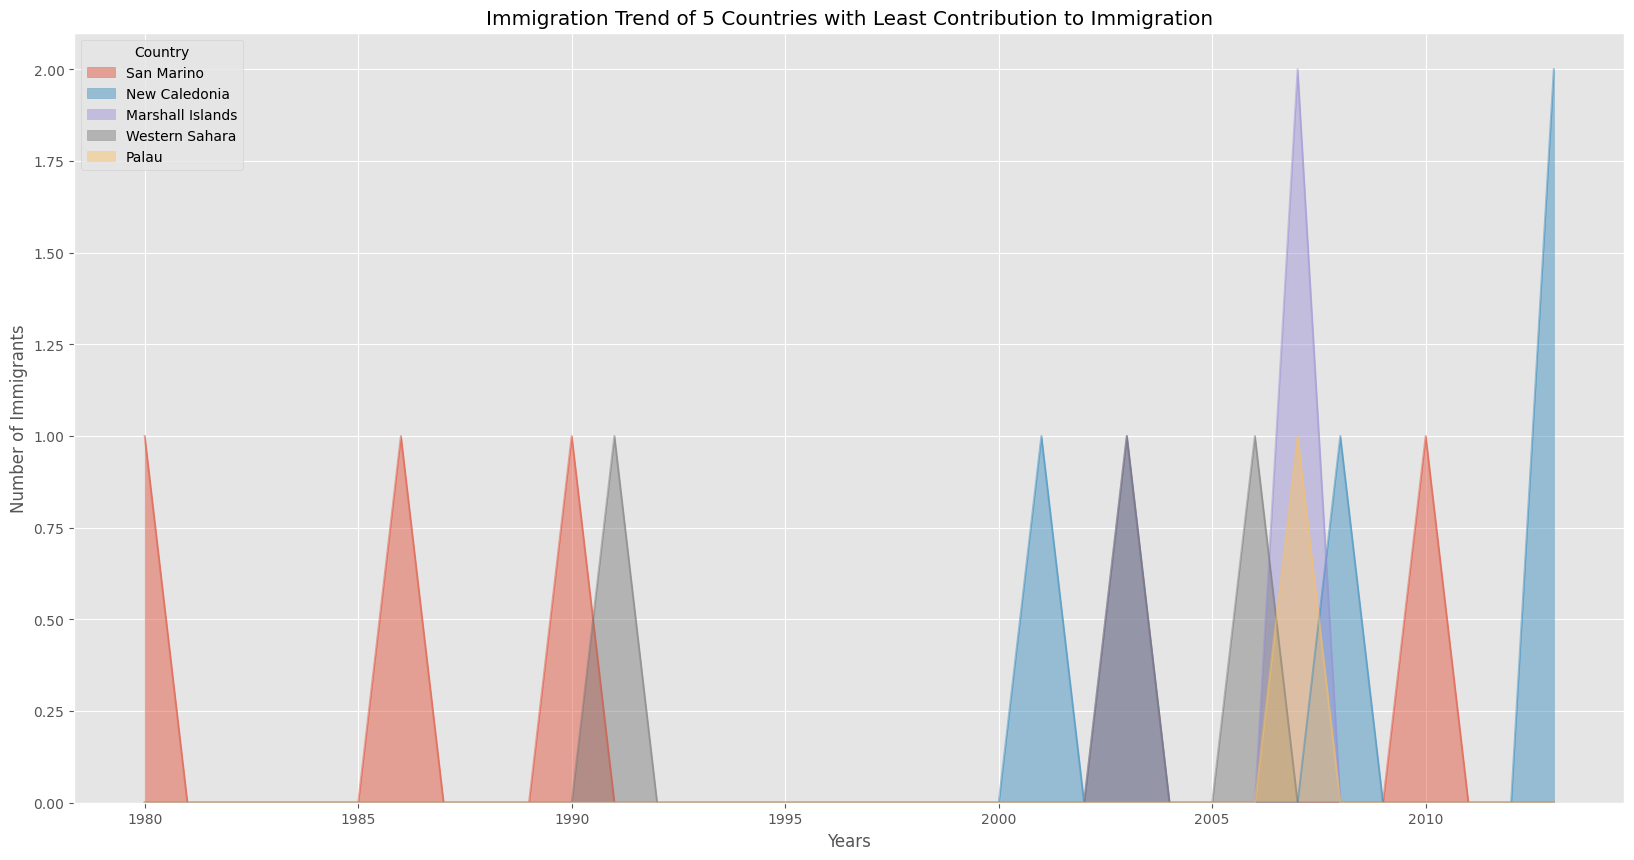

In [19]:
# Goal: Create an unstacked area plot of the 5 countries contributing the least to immigration to Canada from 1980 to 2013.
# Use object oriented method - using an Axes instance from Matplotlib.

# Step 1: Get the 5 countries with the least contribution.
df_least5 = df_can.tail(5)

# Step 2: Transpose the dataframe
df_least5 = df_least5[years].transpose() 
    
# Step 3: Change the index values of df_least 5 to type 'integer' for plotting.
df_least5.index = df_least5.index.map(int) 

# Step 4: Using an Axes instance from Matplotlib and store it in a variable 'ax' to create an unstacked area plot.
ax = df_least5.plot(kind='area', alpha=0.45, stacked=False, figsize=(20, 10))

# Step 5: Add a title and axes labels. 
ax.set_title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

# 2. Histograms<a id="8"></a>

In [20]:
# Goal: Create a histogram of immigration to Canada in 2013,

# Step 1: View the 2013 data to be used for plotting a histogram. 
df_can['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [21]:
# Step 2: Get the frequency distribution of the number (population) of immigrants from the various countries to Canada in 2013.

## np.histogram returns 2 arrays, frequency count and bin edges. 
count, bin_edges = np.histogram(df_can['2013'])

## Print frequency count and bin ranges (default = 10 bins). 
print('frequency counts:')
print(count) 
print()
print('bin edges:')
print(bin_edges)

frequency counts:
[178  11   1   2   0   0   0   0   1   2]

bin edges:
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


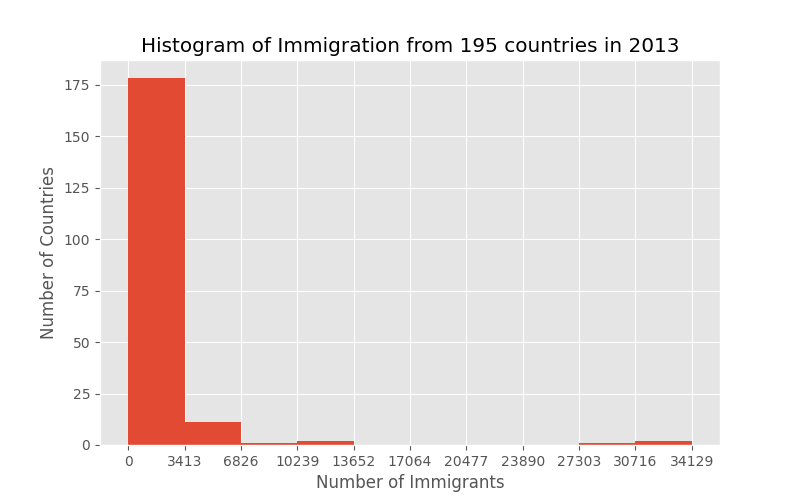

<Figure size 800x500 with 0 Axes>

In [22]:
# Step 3: Create a histogram of immigration to Canada in 2013, in which the x ticks line up with the bin edges. 
# Note that 'bin_edges' is a list of bin intervals.

## Get the frequency (count) and bin edges.
count, bin_edges = np.histogram(df_can['2013'])

## Plot the histogram. 
df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

## Add a title and axes labels. 
plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

## Display the histogram. 
plt.show()

In [23]:
# Goal: Create an unstacked histograms that show the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013.

# Step 1: View the data of these three countries. 
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


In [24]:
# Step 2: Transpose the dataframe that contains the immigration data of Denmark, Norway, and Sweden for years 1980 - 2013. 
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


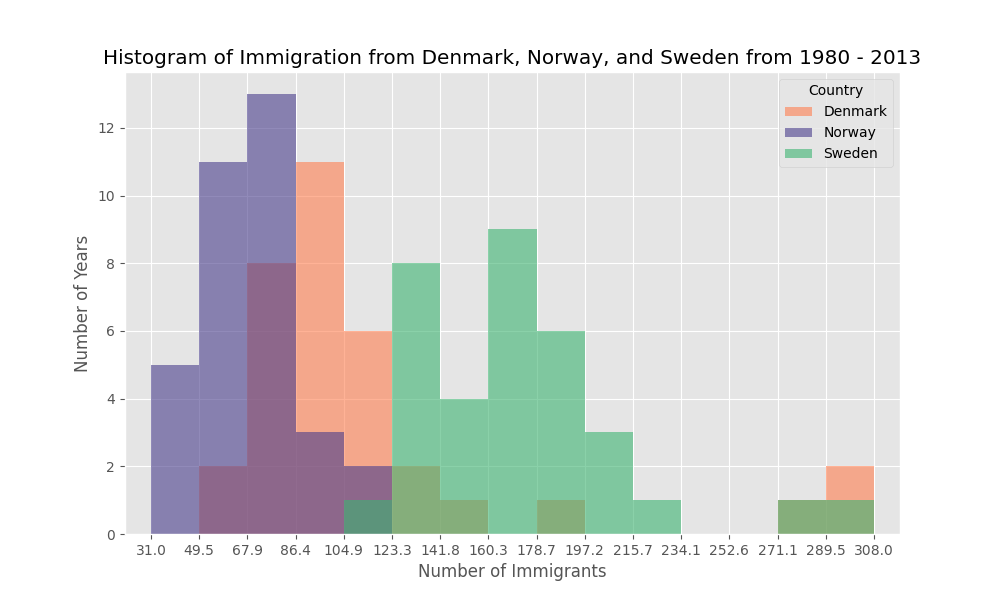

<Figure size 1000x600 with 0 Axes>

In [25]:
# Step 3: Create an unstacked histogram.

## Get the bin edges for lining up with x-ticks (15 bins).
count, bin_edges = np.histogram(df_t, 15)

## Add buffer of 10 at either end of the histogram for aesthetic purposes.
xmin = bin_edges[0] - 10   
xmax = bin_edges[-1] + 10  

## Generate an un-stacked histogram (default: stacked = False).
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          xlim=(xmin, xmax)
         )

## Add a title and axes labels. 
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

## Display the histogram.
plt.show()

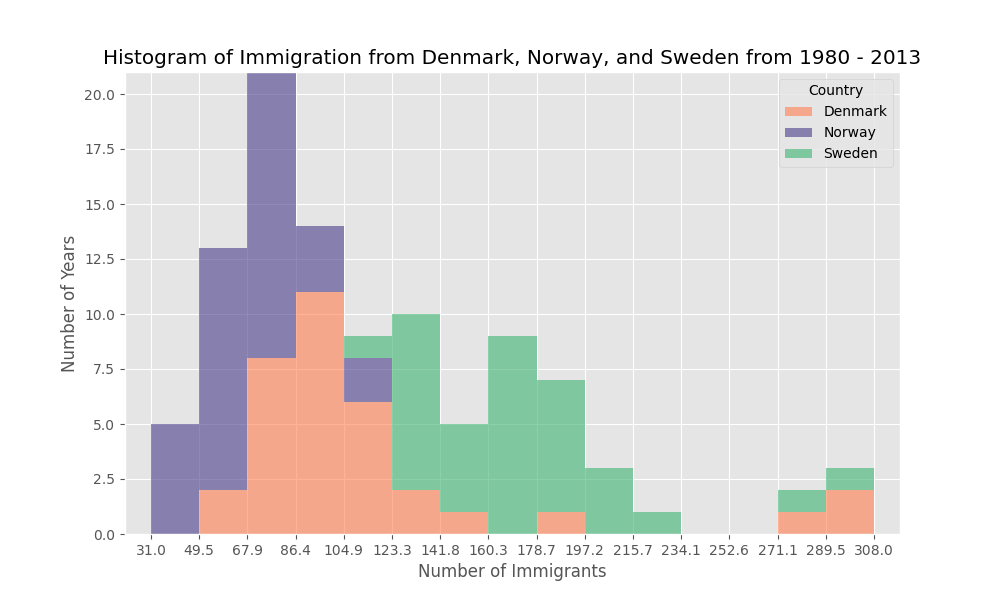

<Figure size 1000x600 with 0 Axes>

In [26]:
# Goal: Create a stacked histogram that shows the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013.

# Step 1: Get the bin edges for lining up with x-ticks (15 bins).
count, bin_edges = np.histogram(df_t, 15)

# Step 2: Add buffer of 10 at either end of the histogram for aesthetic purposes.
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# Step 3: Plot a stacked histogram.
df_t.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

# Step 4: Add a title and axes labels. 
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

# Step 5: Display the histogram.
plt.show()

# 3. Bar Charts <a id="10"></a>

## A. Analyzing the effect of Iceland's Financial Crisis - A Case Study

The 2008 - 2011 Icelandic Financial Crisis was a major economic and political event in Iceland. Relative to the size of its economy, Iceland's systemic banking collapse was the largest experienced by any country in economic history. The crisis led to a severe economic depression in 2008 - 2011 and significant political unrest.
<br>

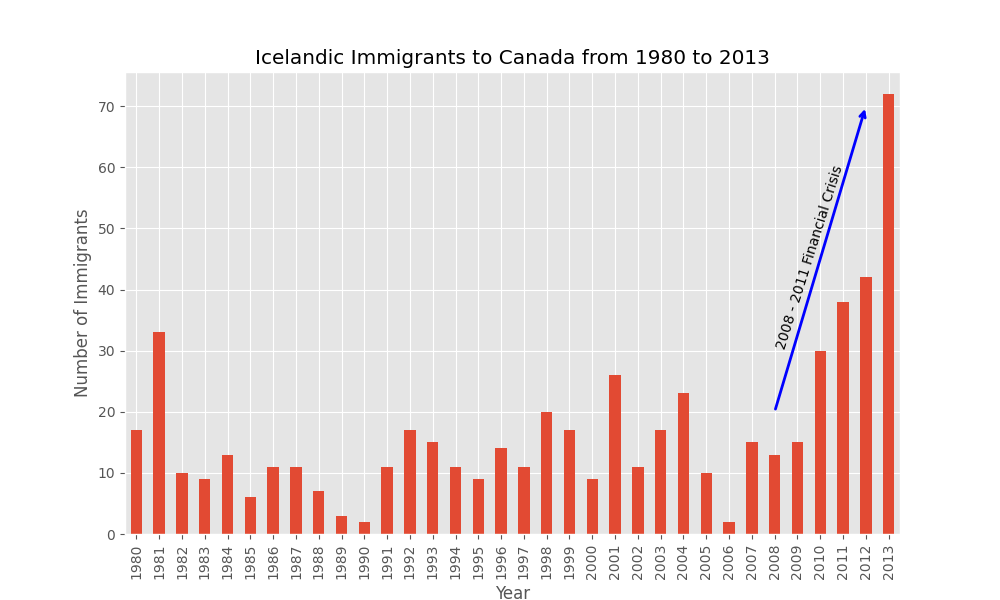

<Figure size 1000x600 with 0 Axes>

In [27]:
# Goal: Create a verical bar chart to show the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.

# Step 1: Get the data
df_iceland = df_can.loc['Iceland', years]

# Step 2: Create the vertical bar chart and rotate the xticks(labelled points on x-axis) by 90 degrees
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)  

# Step 3: Add a title and axes labels. 
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Step 4: Create an Annotate Arrow and place it on the bar chart. 
plt.annotate('',  # s: str. Will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Step 5: Create an Annotate Text and place it along the length of the Annotate Arrow. 
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' aligned.
             )

# Step 6: Display the vertical bar chart. 
plt.show()

### Comment
A sharp increase in immigration to Canada from iceland occurred during and after their financial crisis (2008-2011).
<br>
<br>

## B. The number of immigrants from the top 15 countries between 1980 and 2013

In [28]:
# Goal: Create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013 
# and label each country with the total immigrant count.

# Step 1: Sort the data of the 'Total' column in descending order. 
df_can.sort_values(by='Total', ascending=True, inplace=True)

# Step 2: Get the data of the top 15 countries.
df_top15 = df_can['Total'].tail(15)
df_top15

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

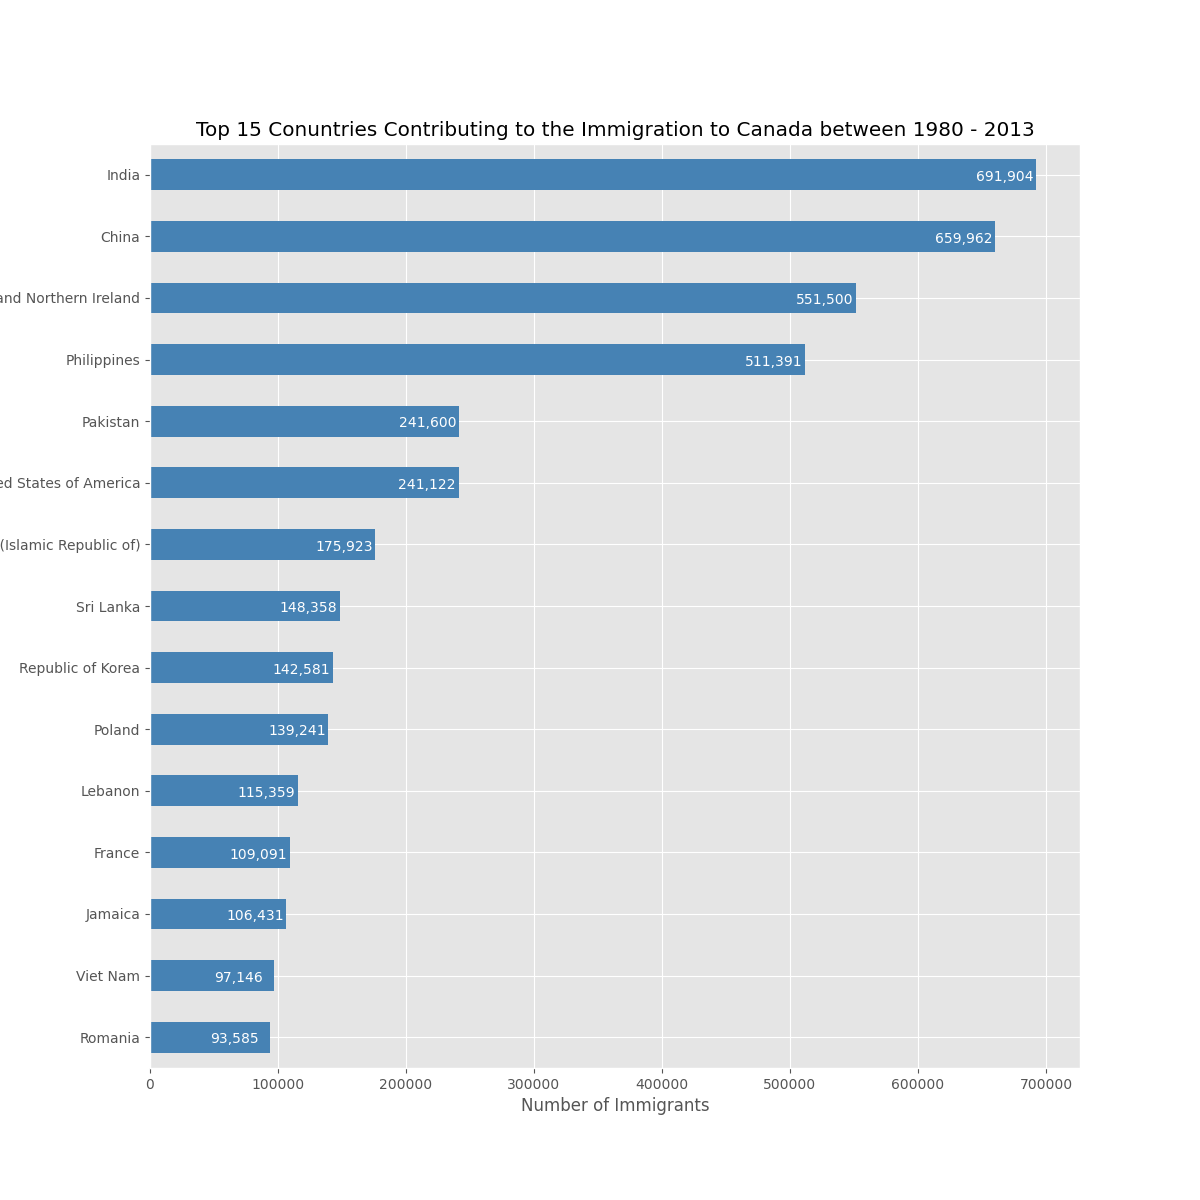

<Figure size 1200x1200 with 0 Axes>

In [29]:
# Step 3: Create a horizontal bar chart.
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')

# Step 4: Add a title and x-axis label. 
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

# Step 5: Create annotate value label for each country and place it at the end of the bar of the country. 
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # Format the label to int type with commas.
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white') # Subtracting 47000 from x and 0.1 from y to make it fit within the bar

# Step 6: Display the horizontal bar chart. 
plt.show()